In [6]:
import numpy as np
import numpy.linalg as LA
import jax
import jax.numpy as jnp

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from jax.example_libraries import optimizers
from tqdm.notebook import trange
from functools import partial

# 関数描写

In [7]:
n = 2
A = 10

In [8]:
def f(x):
    return A*n + np.sum(x**2 - A * np.cos(2* np.pi * x))

In [9]:
x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
X, Y = np.meshgrid(x, y)
Z = np.zeros((len(x), len(y)))
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        Z[i, j] = f(np.array([xi, yj]))
             

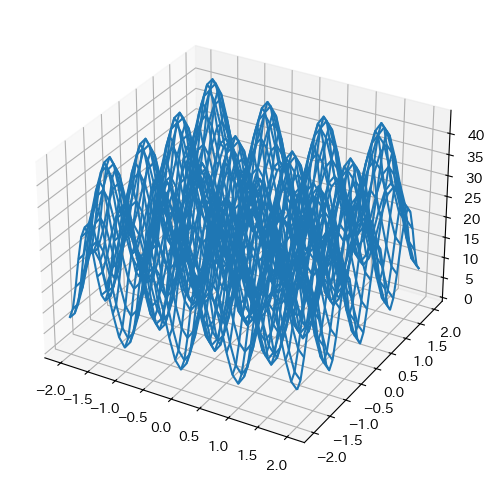

In [10]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})
ax.plot_wireframe(X, Y, Z);

In [11]:
n = 50
num_itr = 150
K = 50
adam_lr = 5e-6
max_inner = 100

A = 10

In [37]:
def f(x):
    return A*n + jnp.sum(x**2 - A * jnp.cos(2* jnp.pi * x))

In [42]:
f = jax.grad(f)
batch_df = jax.jit(jax.vmap(df, in_axes=-1, out_axes=-1))

In [43]:
def mini_batch(K):
    xini = 5.0 * np.random.randn(n ,K)
    return jnp.array(xini)

In [44]:
def get_dot(x):
    return x @ x.T
batch_get_dot = jax.vmap(get_dot, in_axes=-1, out_axes=-1)

In [45]:
@partial(jax.jit, static_argnums=0)
def GD(max_itr, xini, eta):
    x = xini
    for i in range(max_itr):
        x -= eta * batch_df(x)
    return x

def comp_mse(max_itr, eta):
    xini = mini_batch(K)
    x_hat = GD(max_itr, xini, eta)
    return jnp.sum(batch_get_dot(x_hat)) / K

In [46]:
df = pd.DataFrame()
df["Iteration"] = list(range(num_itr))
df["GD ($\eta$ = 0.02)"] = [float(comp_mse(i+1, 0.02)) for i in range(num_itr)]

In [47]:
df["GD ($\eta$ = 0.01)"] = [float(comp_mse(i+1, 0.01)) for i in range(num_itr)]

In [48]:
df["GD ($\eta$ = 0.005)"] = [float(comp_mse(i+1, 0.005)) for i in range(num_itr)]

<Axes: xlabel='Iteration'>

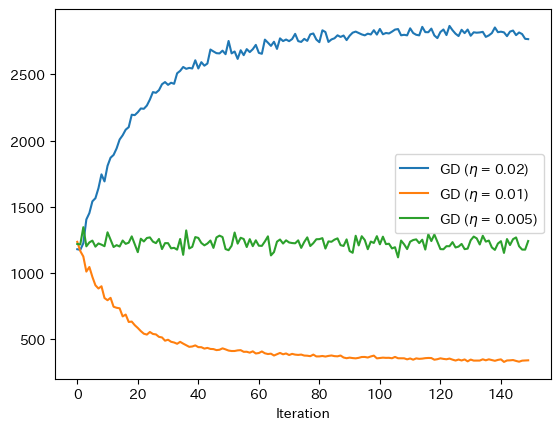

In [50]:
df.plot("Iteration", df.columns[1:])